# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape # 4324 data points

(4324, 9)

In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [ ]:
df_data.count()

,0
Unnamed: 0.1,4324
Unnamed: 0,4324
Organisation,4324
Location,4324
Date,4324
Detail,4324
Rocket_Status,4324
Price,964
Mission_Status,4324


In [ ]:
df_data.columns # column names

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
count_row = df_data.shape[0]  # Gives number of rows
count_col = df_data.shape[1]  # Gives number of columns
print("There are",count_row, "rows and",count_col, "columns in this data.")

There are 4324 rows and 9 columns in this data.


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
print(f'Any NaN values? {df_data.isna().values.any()}')

Any NaN values? True


In [ ]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [ ]:
df_data.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [ ]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


In [ ]:
df_data.isna()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
clean_df = df_data.dropna()


In [ ]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<Axes: xlabel='Organisation'>

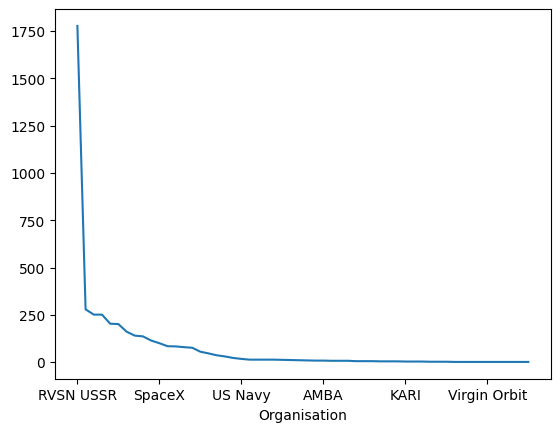

In [ ]:
df_data["Organisation"].value_counts().plot()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
df_data['Rocket_Status'].value_counts()

,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


<Axes: ylabel='Rocket_Status'>

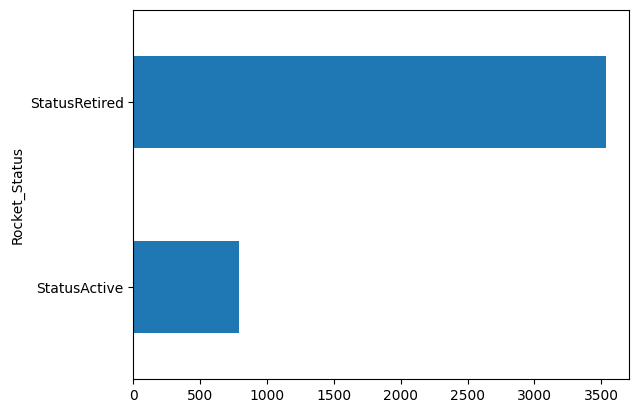

In [ ]:
df_data["Rocket_Status"].value_counts().sort_values().plot(kind="barh")


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data["Mission_Status"].value_counts()


,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [ ]:
df_data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})


,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10)


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
import iso3166

df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"

# Use iso3166 directly instead of 'iso'
countries = {country.name: key for key, country in iso3166.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()


,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


# Chart the Number of Launches per Year

In [ ]:
df_data['date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y', errors='coerce')
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)

ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year',
    'count'
]

fig = px.bar(
    ds,
    x='year',
    y="count",
    orientation='v',
    title='Missions number by year'
)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_data['date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y', errors='coerce') # Specifying the format used previously
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)

ds = df_data['month'].value_counts().reset_index()
ds.columns = [
    'month',
    'count'
]

fig = px.bar(
    ds,
    x='month',
    y="count",
    orientation='v',
    title='Missions number by month'
)
fig.show()

# December has the most launches of all time.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 20


,0
month,12.00
count,20.00


In [ ]:
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 3


,0
month,1.00
count,3.00


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

<Axes: xlabel='year'>

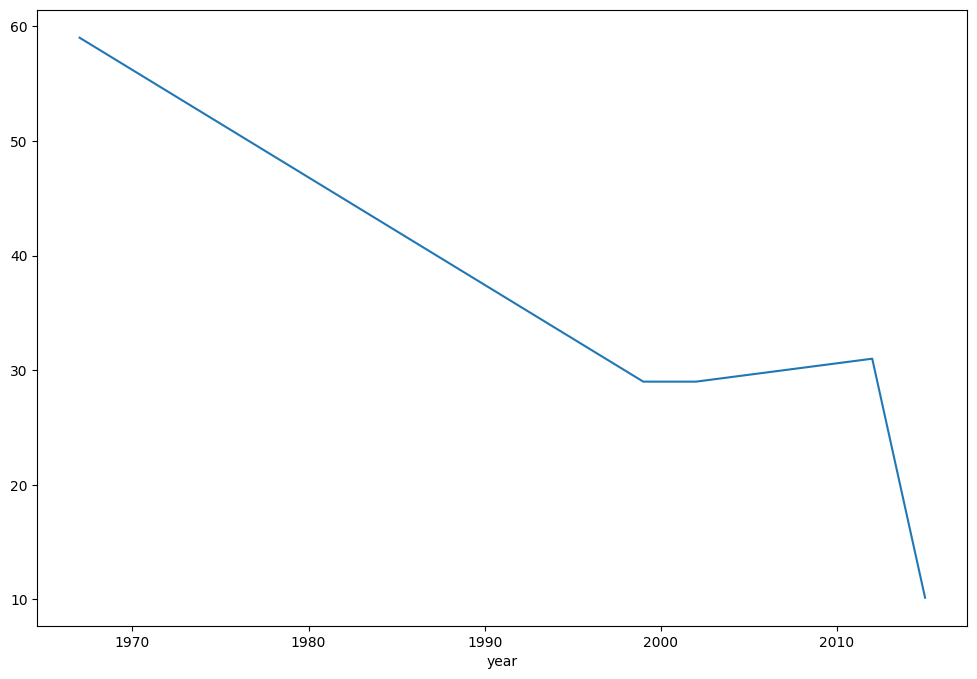

In [ ]:
avg_price = df_data[df_data["Price"].notna()]
pd.options.mode.chained_assignment = None
avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)

# Select only the 'Price' column for the calculation
avg_price.groupby("year")["Price"].mean().plot(figsize=(12, 8))



# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
import pandas as pd
import plotly.express as px  # Assuming you're using plotly.express for visualization


top_10 = pd.DataFrame(columns=df_data.columns)
for val in df_data.groupby("Organisation").count().sort_values("Date", ascending=False)[:10].index:
    print(val)
    org = df_data[df_data.Organisation == val]
    # Use pd.concat instead of append:
    top_10 = pd.concat([top_10, org], ignore_index=True)

top_10

df_data[df_data.Organisation=="CASC"]

top_10.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index


px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation",nbins=10)

RVSN USSR
Arianespace
General Dynamics
CASC
NASA
VKS RF
US Air Force
ULA
Boeing
Martin Marietta


<ipython-input-101-83bd519889c8>:10: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]


In [ ]:
cold_war_years = Or_df.sort_values("year")

cold_war_years[(cold_war_years.year <= 1991)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
4310,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Fri Jul 25, 1958",NOTS-EV-1 Pilot II | Pilot-1 (D1),StatusRetired,NaN,Failure,USA,1958-07-25,"1,958.00",7.00
4302,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Fri Aug 29, 1958",NOTS-EV-1 Pilot II | Pilot-6 (R3,StatusRetired,NaN,Failure,USA,1958-08-29,"1,958.00",8.00
4303,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Tue Aug 26, 1958",NOTS-EV-1 Pilot II | Pilot-5 (R2),StatusRetired,NaN,Failure,USA,1958-08-26,"1,958.00",8.00
4308,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Tue Aug 12, 1958",NOTS-EV-1 Pilot II | Pilot-2 (D2),StatusRetired,NaN,Failure,USA,1958-08-12,"1,958.00",8.00
4306,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Fri Aug 22, 1958",NOTS-EV-1 Pilot II | Pilot-3 (D3),StatusRetired,NaN,Failure,USA,1958-08-22,"1,958.00",8.00
4304,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Mon Aug 25, 1958",NOTS-EV-1 Pilot II | Pilot-4 (R1),StatusRetired,NaN,Failure,USA,1958-08-25,"1,958.00",8.00
4158,US Air Force,"SLC-5, Vandenberg AFB, California, USA","Thu May 24, 1962",Scout X-2M | DSAP-1 F1 (Program 35),StatusRetired,NaN,Failure,USA,1962-05-24,"1,962.00",5.00
4090,US Air Force,"SLC-5, Vandenberg AFB, California, USA","Fri Apr 26, 1963",Scout X-2M | DSAP-1 F4 (Program 35),StatusRetired,NaN,Failure,USA,1963-04-26,"1,963.00",4.00
4084,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Sat Jun 01, 1963",Cosmos-2I (63S1) | DS-MT #1,StatusRetired,NaN,Failure,RUS,1963-06-01,"1,963.00",6.00
4083,General Dynamics,"SLC-3E, Vandenberg AFB, California, USA","Wed Jun 12, 1963",Atlas-LV3 Agena-B | Midas 8,StatusRetired,NaN,Failure,USA,1963-06-12,"1,963.00",6.00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
Or_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,NaT,NaN,NaN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,NaT,NaN,NaN
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,NaT,NaN,NaN
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,NaT,NaN,NaN
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.0,Success,USA,NaT,NaN,NaN


In [ ]:
launches = Or_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

,Country,counts
0,RUS,1398
1,USA,1351


([<matplotlib.patches.Wedge at 0x7f54f989feb0>,
 [Text(-0.029538143850861738, 1.09960333668912, 'RUS'),
  Text(0.029538143850861114, -1.09960333668912, 'USA')])

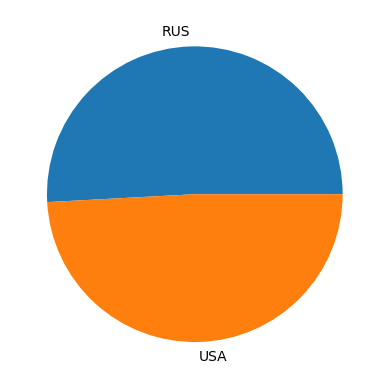

In [ ]:
colors = ["#1f77b4", "#ff7f0e"]
grouping = Or_df.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

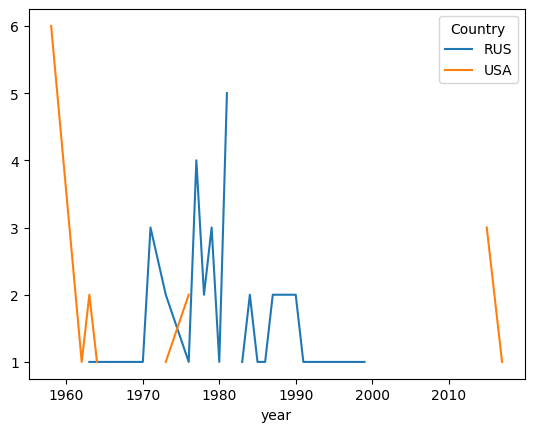

In [ ]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
Or_df.groupby(["year", "Country"]).size().unstack().plot()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
Or_df = df_data[df_data['Mission_Status'].str.contains("Failure")]
Or_df.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,CHN,NaT,NaN,NaN
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,NZL,NaT,NaN,NaN
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,NaT,NaN,NaN
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,NaT,NaN,NaN
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN,NaT,NaN,NaN


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

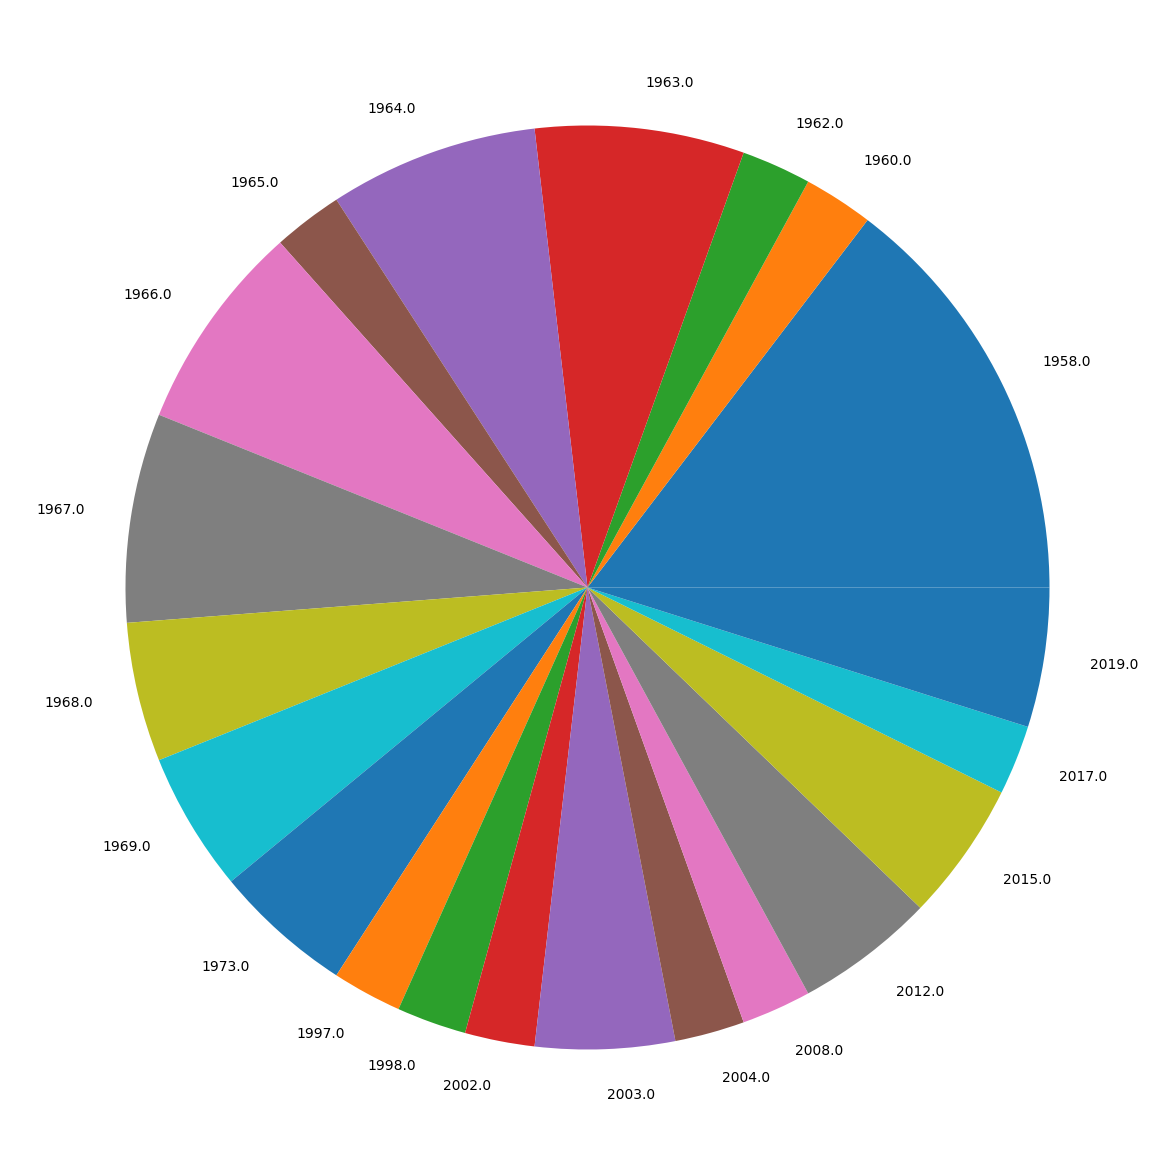

In [ ]:
grouping = Or_df.groupby("year").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['year']

plt.pie(sizes, labels = labels)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()


,year,Country,counts
0,"1,958.00",USA,6
1,"1,960.00",KAZ,1
2,"1,962.00",USA,1
3,"1,963.00",USA,2
4,"1,963.00",RUS,1


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
org_launches = df_data.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()


,year,Organisation,counts
0,"1,958.00",US Navy,6
1,"1,960.00",RVSN USSR,1
2,"1,962.00",US Air Force,1
3,"1,963.00",General Dynamics,1
4,"1,963.00",RVSN USSR,1


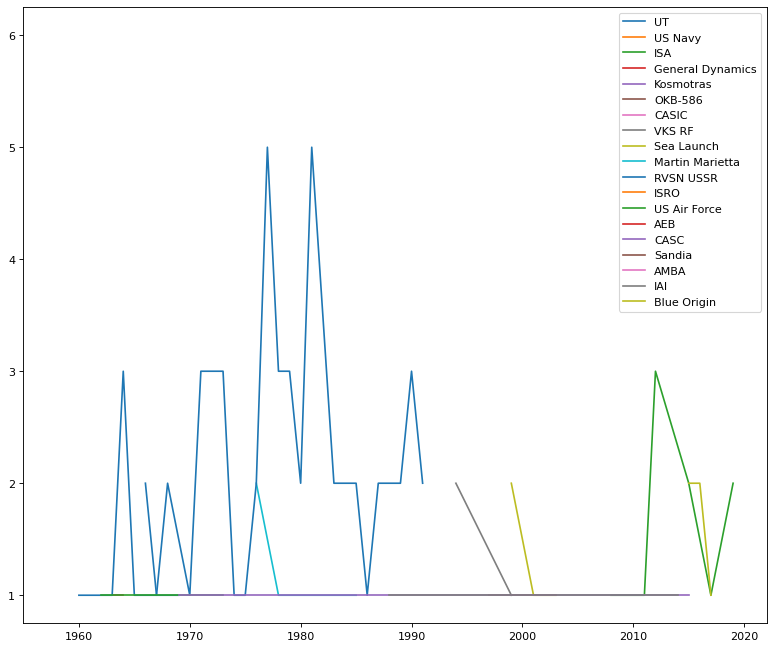

In [ ]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)

plt.legend()
plt.show()